## Analysing and Preparing Data

###Charging Data

In [ ]:
# Basic example loading images from the svhn dataset

# Dictionaries
import scipy.io as sio
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

# Mount Google Drive
drive.mount('/content/drive')
data_path = '/content/drive/My Drive/DeepLearning_2022/PROJECT/Data/'
results_path = '/content/drive/My Drive/DeepLearning_2022/PROJECT/Results/'

import csv

# Charge the data

#we read the dataset TweetsEmotions for tweet emotions --> 9870 tweets
data_emotion = pd.read_csv(data_path+'TweetsEmotions.csv', index_col = 0)
#we read the dataset emotions that we will use to increase the dataset of emotions
data_emotion2 = pd.read_csv(data_path+'emotions2.csv', index_col = 0)

#we read the datasets
data_emoji = pd.read_csv(data_path+'emoticons_polarity_emotion_filtered.csv',index_col = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Preparing Data emotion data

In [ ]:
#we adapt the auxiliary dataset
data_em = {"Feeling":[]}
data_em = pd.DataFrame(data_em)

data_em["Feeling"]=data_emotion2["Feeling"]
data_em.index.name = 'Tweets'
data_em.reset_index(inplace=True)

In [ ]:
print(data_em)

                                                  Tweets  Feeling
0                                i didnt feel humiliated  sadness
1      i can go from feeling so hopeless to so damned...  sadness
2       im grabbing a minute to post i feel greedy wrong    anger
3      i am ever feeling nostalgic about the fireplac...     love
4                                   i am feeling grouchy    anger
...                                                  ...      ...
15995  i just had a very brief time in the beanbag an...  sadness
15996  i am now turning and i feel pathetic that i am...  sadness
15997                     i feel strong and good overall      joy
15998  i feel like this was such a rude comment and i...    anger
15999  i know a lot but i feel so stupid because i ca...  sadness

[16000 rows x 2 columns]


In [ ]:
print(data_em.columns)

Index(['Tweets', 'Feeling'], dtype='object')


In [ ]:
# we wil use sadness, anger and fear
print(data_em["Feeling"].value_counts())

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Feeling, dtype: int64


In [ ]:
#we change the names of the feeling so that both datasets coincide
for i in range(len(data_em)):
  if data_em.loc[i,'Feeling']=='sadness':
    data_em.loc[i,'Feeling'] = 'sad'
  elif data_em.loc[i,'Feeling']=='anger':
    data_em.loc[i,'Feeling'] = 'angry'


In [ ]:
print(data_em[data_em['Feeling']=='sad'])
print(data_em[data_em['Feeling']=='angry'])
print(data_em[data_em['Feeling']=='fear'])

                                                  Tweets Feeling
0                                i didnt feel humiliated     sad
1      i can go from feeling so hopeless to so damned...     sad
5      ive been feeling a little burdened lately wasn...     sad
10     i feel like i have to make the suffering i m s...     sad
13                    i feel low energy i m just thirsty     sad
...                                                  ...     ...
15988            i feel pathetic because im still single     sad
15991  i have wanted to perhaps convey my feelings of...     sad
15995  i just had a very brief time in the beanbag an...     sad
15996  i am now turning and i feel pathetic that i am...     sad
15999  i know a lot but i feel so stupid because i ca...     sad

[4666 rows x 2 columns]
                                                  Tweets Feeling
2       im grabbing a minute to post i feel greedy wrong   angry
4                                   i am feeling grouchy   angry


In [ ]:
#we add data from the auxiliary dataset
data_e = data_e.append(data_em[data_em['Feeling']=='sad'].sample(n=700),ignore_index=True)
data_e = data_e.append(data_em[data_em['Feeling']=='angry'],ignore_index=True)
data_e = data_e.append(data_em[data_em['Feeling']=='fear'],ignore_index=True)
print(data_e)
print(data_e['Feeling'].value_counts())

                                                  Tweets Feeling
Sl no                                                           
1       #1: @fe ed "RT @MirayaDizon1: Time is ticking...   happy
2       #2: @蓮花 &はすか ed "RT @ninjaryugo: ＃コナモンの日 だそうで...   happy
3       #3: @Ris ♡ ed "Happy birthday to one smokin h...   happy
4       #4: @월월 [씍쯴사랑로봇] jwinnie is the best, cheer u...   happy
5       #5: @Madhurima wth u vc♥ ed "Good morning dea...   happy
...                                                  ...     ...
10016  Tweet #85: @Matteo tweeted "@GameSpot @Frannkc...   angry
10017  Tweet #86: @𝐚𝐧𝐢𝐬𝐭𝐨𝐧 tweeted "@BRATgiirl_ that’...   angry
10018  Tweet #87: @Chowkidar Ricky Sharma tweeted "@M...   angry
10019  Tweet #88: @Katoe.EXE tweeted "u know what i h...   angry
10019  Tweet #88: @Katoe.EXE tweeted "u know what i h...   angry

[10017 rows x 2 columns]
happy       3928
sad         2849
angry       1341
fear         863
disgust      637
surprise     399
Name: Feeling, dtype: int64

In [ ]:
data_e = data_e.drop(10019)

In [ ]:
data_e['Feeling'].value_counts()

happy       3928
sad         3548
angry       3500
fear        2800
disgust      637
surprise     399
Name: Feeling, dtype: int64

In [ ]:
#we shuffle the data
from sklearn.utils import shuffle
data_e= shuffle(data_e)

In [ ]:
#we set the polarity depending on the emotion
for i, row in data_e.iterrows():
  if data_e.loc[i, "Feeling"] == "happy" or data_e.loc[i, "Feeling"] == "surprise":
    data_e.loc[i, "Polarity"] = 1
  elif data_e.loc[i, "Feeling"] == "sad" or data_e.loc[i, "Feeling"] == "angry" or data_e.loc[i, "Feeling"] == "fear" or data_e.loc[i, "Feeling"] == "disgust":
    data_e.loc[i, "Polarity"] = 0

data_e.reindex()
#we divide the dataset according to the polarity, and we will use the one with negative polarity
data_e_0 = data_e[data_e["Polarity"] == 0].reindex()
data_e_1 = data_e[data_e["Polarity"] == 1].reindex()

In [ ]:
data_e["Polarity"].value_counts()

0.0    10485
1.0     4327
Name: Polarity, dtype: int64

In [ ]:
#add corresponding value to the emotions
for i,row  in data_e_0.iterrows():
  if data_e_0.loc[i, "Feeling"] == "sad":
    data_e_0.loc[i, "Feeling"] = 0
  elif data_e_0.loc[i, "Feeling"] == "angry":
    data_e_0.loc[i, "Feeling"] = 1
  elif data_e_0.loc[i, "Feeling"] == "fear":
    data_e_0.loc[i, "Feeling"] = 2
  elif data_e_0.loc[i, "Feeling"] == "disgust":
    data_e_0.loc[i, "Feeling"] = 3

for i,row  in data_e_1.iterrows():
  if data_e_1.loc[i, "Feeling"] == "happy":
    data_e_1.loc[i, "Feeling"] = 1
  elif data_e_1.loc[i, "Feeling"] == "surprise":
    data_e_1.loc[i, "Feeling"] = 0

In [ ]:
data_e_0["Feeling"].value_counts()

0    3548
1    3500
2    2800
3     637
Name: Feeling, dtype: int64

###Preparing Data Emotion Polarity 0

In [ ]:
import re
from string import punctuation

all_tweets_e_0 = list()

for t in data_e_0["Tweets"]:
  #t = 'a ' + t
  #t = re.sub("(?:\s)@[^, ]*", '', t)
  #t = re.sub("(?:\s)#[^, ]*", '', t)
  t = t[4:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_e_0.append(t)

all_text = " ".join(all_tweets_e_0)
all_words = all_text.split()

In [ ]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : ",sorted_words[:10])

Top ten occuring words :  [('the', 5720), ('i', 5283), ('to', 5226), ('and', 4788), ('ed', 4254), ('a', 4247), ('of', 3269), ('rt', 2918), ('that', 2382), ('in', 2275)]


In [ ]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [ ]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_e_0:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

0
227601
[10325, 5, 8, 6584, 222, 12, 3480, 233, 4, 2250, 1082, 408, 59, 32, 2749, 233, 535, 1692, 1, 137, 1589, 4088, 12, 1442, 1443]


In [ ]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features_e_0 = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features_e_0.append(np.array(new))

### Preparing Data Emoji

In [ ]:
# Again not all types have the same number of data, dangerous
print(data_emoji)
print(data_emoji["emotion"].value_counts())

                                                  tweet  \
0     The woman who was forced into child labour dur...   
1     A group of children who fled #Mariupol are now...   
2     @MZavala86 @RT_com Dictator Vladimir Putin has...   
3     Yesterday in Brussels during a peaceful strike...   
4     😡 The Russians who left the #Chornobyl nuclear...   
...                                                 ...   
2068  Let’s stop the russian spelling and name it th...   
2069  #Lysychansk after #Putin 🤬 #Лисичанськ #Україн...   
2070  This is really brutal! 🤬\n\nA Ukrainian office...   
2071  Hey #Germany! Are you going to start using #pe...   
2072  Go figure ...India won't condemn Russia for (t...   

                          emoji  polarity  emotion  
0                         ['😭']         0        3  
1                         ['😭']         0        3  
2                         ['😂']         1        1  
3                         ['😓']         0        3  
4                         

In [ ]:
data_emoji_0 = data_emoji[data_emoji["polarity"]==0]
data_emoji_0["emotion"].value_counts()

3    496
4    400
6     46
5      5
Name: emotion, dtype: int64

In [ ]:
#change the values of emotion according to the emotion dataset
for i,row in data_emoji_0.iterrows():
  if (data_emoji_0.loc[i,"emotion"]==3): #sad
    data_emoji_0.loc[i,"emotion"]=0
  elif (data_emoji_0.loc[i,"emotion"]==4): #anger
    data_emoji_0.loc[i,"emotion"]=1
  elif (data_emoji_0.loc[i,"emotion"]==5): #fear
    data_emoji_0.loc[i,"emotion"]=2
  elif (data_emoji_0.loc[i,"emotion"]==6): #disgust
    data_emoji_0.loc[i,"emotion"]=3 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
data_emoji_0["emotion"].value_counts()

0    496
1    400
3     46
2      5
Name: emotion, dtype: int64

###Analysing tweets

In [ ]:
#split_dataset into 80% training , 10% test and 10% Validation Dataset
train_x=features_e_0[:int(0.8*len(features_e_0))]
train_y=data_e_0["Feeling"][:int(0.8*len(features_e_0))]
valid_x=features_e_0[int(0.8*len(features_e_0)):int(0.9*len(features_e_0))]
valid_y=data_e_0["Feeling"][int(0.8*len(features_e_0)):int(0.9*len(features_e_0))]
test_x=features_e_0[int(0.9*len(features_e_0)):]
test_y=data_e_0["Feeling"][int(0.9*len(features_e_0)):]
print(len(train_y), len(valid_y), len(test_y))

8388 1048 1049


##Train the model

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([64, 104])
Sample input: 
 tensor([[   0,    0,    0,  ..., 1145,  169, 5563],
        [   0,    0,    0,  ...,   82,   28, 1156],
        [   0,    0,    0,  ...,  279,    9,   75],
        ...,
        [   0,    0,    0,  ..., 3486, 3487, 2074],
        [   0,    0,    0,  ...,   67,   42,   95],
        [   0,    0,    0,  ...,   27,   65,  281]])
Sample label size:  torch.Size([64])
Sample label: 
 tensor([0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2,
        1, 1, 0, 2, 3, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 2, 3, 0, 2,
        2, 0, 2, 0, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 2])


In [ ]:
import torch.nn as nn
 
class LSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        
        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        #dropout layer
        self.dropout=nn.Dropout(0.5)
        
        #Linear layer
        self.fc1=nn.Linear(hidden_dim, output_size) #now the outputs are torch of size 4
        #activation function
        self.sigmoid=nn.Sigmoid()
        self.softAct = nn.Softmax()
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()
        
        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)

        #stack up the lstm output
        # lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)

        #dropout and fully connected layers
        out=self.dropout(lstm_out)
        out=self.fc1(out)
        #out=self.dropout(out)
        #out=self.fc2(out)
        #out=self.dropout(out)
        #out=self.fc3(out)
       
        
       # out = self.fc3(out)
        sig_out = self.softAct(out)
        sig_out = sig_out[:,-1,:]
      
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 4
embedding_dim = 400
hidden_dim = 600
n_layers = 2

net = LSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(31823, 400)
  (lstm): LSTM(400, 600, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=600, out_features=4, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=4, bias=True)
  (sigmoid): Sigmoid()
  (softAct): Softmax(dim=None)
)


In [ ]:
# loss and optimization functions
lr=0.0001

#now we use cross entropy loss since we have multiple classes
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=0.0001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 20

training_loss=[]
validation_loss=[]

counter = 0
print_every = 20
# gradient clipping
clip=5 

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()
        try:
          # get the output from the model
          output, h = net(inputs, h)
          # calculate the loss and perform backprop
          loss = criterion(output, labels)
          loss.backward()
          # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
          nn.utils.clip_grad_norm_(net.parameters(), clip)
          optimizer.step()
        except:
          counter -=1

        # validation
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()
                try:
                  output, val_h = net(inputs, val_h)
                  val_loss = criterion(output, labels)
                  val_losses.append(val_loss.item())
                except:
                  pass
                 
            training_loss.append(loss)
            validation_loss.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1/20... Step: 20... Loss: 1.386211... Val Loss: 1.386259
Epoch: 1/20... Step: 40... Loss: 1.386264... Val Loss: 1.386224
Epoch: 1/20... Step: 60... Loss: 1.386250... Val Loss: 1.386197
Epoch: 1/20... Step: 80... Loss: 1.386168... Val Loss: 1.386161
Epoch: 1/20... Step: 100... Loss: 1.385948... Val Loss: 1.386117
Epoch: 1/20... Step: 120... Loss: 1.385986... Val Loss: 1.386036
Epoch: 2/20... Step: 140... Loss: 1.385814... Val Loss: 1.385930
Epoch: 2/20... Step: 160... Loss: 1.385358... Val Loss: 1.385681
Epoch: 2/20... Step: 180... Loss: 1.384871... Val Loss: 1.384267
Epoch: 2/20... Step: 200... Loss: 1.379045... Val Loss: 1.379736
Epoch: 2/20... Step: 220... Loss: 1.377188... Val Loss: 1.376450
Epoch: 2/20... Step: 240... Loss: 1.375739... Val Loss: 1.375174
Epoch: 2/20... Step: 260... Loss: 1.376034... Val Loss: 1.374563
Epoch: 3/20... Step: 280... Loss: 1.375571... Val Loss: 1.374028
Epoch: 3/20... Step: 300... Loss: 1.368976... Val Loss: 1.371402
Epoch: 3/20... Step: 320... L

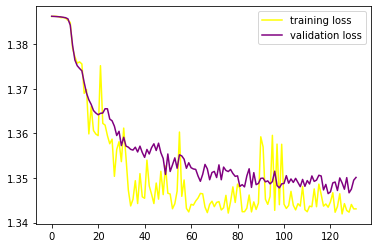

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


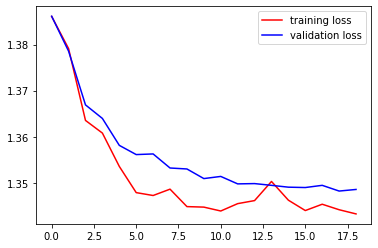

In [ ]:
#plot of losses over steps
t1 = []
for i in training_loss:
  t1.append(i.cpu().item())


plt.plot(t1,'yellow', label="training loss")
plt.plot(validation_loss, 'purple', label="validation loss")
plt.legend()
plt.show()

#plot of losses over epochs
t = []
v = []
for i in range(0,20):
  v.append(np.mean(validation_loss[i*7:(i+1)*7]))
  t.append(np.mean(t1[i*7:(i+1)*7]))

plt.plot(t,'red',label='training loss')
plt.plot(v, 'blue', label='validation loss')

plt.legend()
plt.show()

In [ ]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_sad_correct = 0
num_anger_correct = 0
num_fear_correct = 0
num_disgust_correct = 0
total_s = 0
total_a = 0
total_f = 0
total_d = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test dataset
for inputs, labels in test_loader:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])

  if(train_on_gpu):
    inputs, labels = inputs.cuda(), labels.cuda()

  try:
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output, labels)
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class (0,1,2,3) by taking the argmax (position with largest value in torch)
    pred = output.argmax(1, keepdim = True)
    correct_tensor = pred.eq(labels.view_as(pred))
    # compare predictions to true label
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    num_correct += np.sum(correct)
    #count the number of correct predictions for each of the emotions
    for i in range(64):
      if labels[i]==0:
        total_s +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_sad_correct += np.sum(correct)
      if labels[i]==1:
        total_a +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_anger_correct += np.sum(correct)
      if labels[i]==2:
        total_f +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_fear_correct += np.sum(correct)
      if labels[i]==3:
        total_d +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_disgust_correct += np.sum(correct)
  except:
    pass

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data and each of the emotions
test_acc = num_correct/len(test_loader.dataset)
test_acc_s = num_sad_correct/total_s
test_acc_a = num_anger_correct/total_a
test_acc_f = num_fear_correct/total_f
test_acc_d = num_disgust_correct/total_d
print("Test accuracy: {:.3f}".format(test_acc))
print("Test sad accuracy: {:.6f}".format(test_acc_s))
print("Test anger accuracy: {:.6f}".format(test_acc_a))
print("Test fear accuracy: {:.6f}".format(test_acc_f))
print("Test disgust accuracy: {:.6f}".format(test_acc_d))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test loss: 1.348
Test accuracy: 0.546
Test sad accuracy: 0.539185
Test anger accuracy: 0.551913
Test fear accuracy: 0.567376
Test disgust accuracy: 0.684211


##Clean the Ucraine-Russia dataset and use it for negative emotions testing

In [ ]:
data_emoji_0.reset_index(inplace = True)
a = 'a ' + data_emoji_0.loc[0,'tweet']
a = re.sub("(?:\s)@[^, ]*", '', a)
a = a[2:]

In [ ]:
import re

all_tweets_u = list()
for t in data_emoji_0["tweet"]:
  t = 'a ' + t
  t = re.sub("(?:\s)@[^, ]*", '', t)
  t = t[2:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_u.append(t)
all_text = " ".join(all_tweets_u)
all_words = all_text.split()

In [ ]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_u:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

7139
17125
[1, 491, 58, 31, 1997, 107, 480, 2233, 271, 0, 4, 75, 12, 1997, 3, 501, 55, 197, 0, 23, 993, 85, 12, 6, 2353, 0, 3, 55, 641, 922, 1, 0, 7, 55, 91, 0, 2398, 497, 52, 0, 44, 0]


In [ ]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features.append(np.array(new))

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

test_x_u=features[:int(len(features))]
test_y_u=data_emoji_0["emotion"][:int(len(features))]

#create Tensor Dataset
test_data_u=TensorDataset(torch.FloatTensor(test_x_u).to(torch.int64), torch.FloatTensor(test_y_u.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
test_loader_u=DataLoader(test_data_u, batch_size=batch_size, shuffle=True)

In [ ]:
test_losses = [] # track loss
num_correct = 0
num_sad_correct = 0
num_anger_correct = 0
num_fear_correct = 0
num_disgust_correct = 0
total_s = 0
total_a = 0
total_f = 0
total_d = 0
# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader_u:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])

  if(train_on_gpu):
    inputs, labels = inputs.cuda(), labels.cuda()

  try:
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output, labels)
    test_losses.append(test_loss.item())

    #predict the label by taking the argmax
    pred = output.argmax(1, keepdim = True)
    correct_tensor = pred.eq(labels.view_as(pred))
    # compare predictions to true label
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    num_correct += np.sum(correct)

    #count the correct predictions for each of the emotions
    for i in range(64):
      if labels[i]==0:
        total_s +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_sad_correct += np.sum(correct)
      if labels[i]==1:
        total_a +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_anger_correct += np.sum(correct)
      if labels[i]==2:
        total_f +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_fear_correct += np.sum(correct)
      if labels[i]==3:
        total_d +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_disgust_correct += np.sum(correct)
  except:
    pass
# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data and each of the emotions
test_acc = num_correct/len(test_loader.dataset)
test_acc_s = num_sad_correct/total_s
test_acc_a = num_anger_correct/total_a
test_acc_f = num_fear_correct/total_f
test_acc_d = num_disgust_correct/total_d
print("Test accuracy: {:.3f}".format(test_acc))
print("Test sad accuracy: {:.6f}".format(test_acc_s))
print("Test anger accuracy: {:.6f}".format(test_acc_a))
print("Test fear accuracy: {:.6f}".format(test_acc_f))
print("Test disgust accuracy: {:.6f}".format(test_acc_d))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test loss: 1.379
Test accuracy: 0.294
Test sad accuracy: 0.321577
Test anger accuracy: 0.389041
Test fear accuracy: 0.000000
Test disgust accuracy: 0.250000


##Prepare data: remove disgust

###Preparing Data Emotion Polarity 0

In [ ]:
data_e_0 = data_e_0.drop(data_e_0[data_e_0["Feeling"]==3].index)
data_e_0 = data_e_0.reindex()
print(data_e_0['Feeling'].value_counts())

0    3548
1    3500
2    2800
Name: Feeling, dtype: int64


In [ ]:
import re
from string import punctuation

all_tweets_e_0 = list()

for t in data_e_0["Tweets"]:
  #t = 'a ' + t
  #t = re.sub("(?:\s)@[^, ]*", '', t)
  #t = re.sub("(?:\s)#[^, ]*", '', t)
  t = t[4:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_e_0.append(t)

all_text = " ".join(all_tweets_e_0)
all_words = all_text.split()

In [ ]:
from collections import Counter 
# Count all the words using Counter Method
count_words = Counter(all_words)
total_words=len(all_words)
sorted_words=count_words.most_common(total_words)
print("Top ten occuring words : ",sorted_words[:10])

Top ten occuring words :  [('the', 5356), ('i', 5146), ('to', 4862), ('and', 4548), ('a', 3845), ('ed', 3615), ('of', 3109), ('rt', 2569), ('that', 2303), ('in', 2114)]


In [ ]:
vocab_to_int={w:i+1 for i,(w,c) in enumerate(sorted_words)}

In [ ]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_e_0:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

0
210566
[20, 388, 42, 9, 457]


In [ ]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features_e_0 = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features_e_0.append(np.array(new))

###Preparing Data Emoji


In [ ]:
# Again not all types have the same number of data, dangerous
print(data_emoji["emotion"].value_counts())

1    1103
3     496
4     400
6      46
2      23
5       5
Name: emotion, dtype: int64


In [ ]:
data_emoji_0 = data_emoji[data_emoji["polarity"]==0]
data_emoji_0["emotion"].value_counts()

3    496
4    400
6     46
5      5
Name: emotion, dtype: int64

In [ ]:
for i,row in data_emoji_0.iterrows():
  if (data_emoji_0.loc[i,"emotion"]==3):
    data_emoji_0.loc[i,"emotion"]=0
  elif (data_emoji_0.loc[i,"emotion"]==4):
    data_emoji_0.loc[i,"emotion"]=1
  elif (data_emoji_0.loc[i,"emotion"]==5):
    data_emoji_0.loc[i,"emotion"]=2
  elif (data_emoji_0.loc[i,"emotion"]==6):
    data_emoji_0.loc[i,"emotion"]=3 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
data_emoji_0 = data_emoji_0.drop(data_emoji_0[data_emoji_0["emotion"]==3].index)
data_emoji_0 = data_emoji_0.reindex()
data_emoji_0["emotion"].value_counts()

0    496
1    400
2      5
Name: emotion, dtype: int64

###Analysing tweets

In [ ]:
#split_dataset into 80% training , 10% test and 10% Validation Dataset
train_x=features_e_0[:int(0.8*len(features_e_0))]
train_y=data_e_0["Feeling"][:int(0.8*len(features_e_0))]
valid_x=features_e_0[int(0.8*len(features_e_0)):int(0.9*len(features_e_0))]
valid_y=data_e_0["Feeling"][int(0.8*len(features_e_0)):int(0.9*len(features_e_0))]
test_x=features_e_0[int(0.9*len(features_e_0)):]
test_y=data_e_0["Feeling"][int(0.9*len(features_e_0)):]
print(len(train_y), len(valid_y), len(test_y))

7878 985 985


##Train the model without disgust

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

#create Tensor Dataset
train_data=TensorDataset(torch.FloatTensor(train_x).to(torch.int64), torch.FloatTensor(train_y.to_numpy(dtype=np.float64)).to(torch.int64))
valid_data=TensorDataset(torch.FloatTensor(valid_x).to(torch.int64), torch.FloatTensor(valid_y.to_numpy(dtype=np.float64)).to(torch.int64))
test_data=TensorDataset(torch.FloatTensor(test_x).to(torch.int64), torch.FloatTensor(test_y.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
train_loader=DataLoader(train_data, batch_size=batch_size, shuffle=True)
valid_loader=DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_loader=DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [ ]:
import torch.nn as nn
 
class LSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """
    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):    
        """
        Initialize the model by setting up the layers
        """
        super().__init__()
        self.output_size=output_size
        self.n_layers=n_layers
        self.hidden_dim=hidden_dim
        
        #Embedding and LSTM layers
        self.embedding=nn.Embedding(vocab_size, embedding_dim)
        self.lstm=nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
        
        #dropout layer
        self.dropout=nn.Dropout(0.3)
        
        #Linear and activation layer
        self.fc1=nn.Linear(hidden_dim, output_size)
        #self.fc2=nn.Linear(64, 16)
        #self.fc3=nn.Linear(16,output_size)
        self.sigmoid=nn.Sigmoid()
        self.softAct = nn.Softmax()
    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size=x.size()
        
        #Embadding and LSTM output
        embedd=self.embedding(x)
        lstm_out, hidden=self.lstm(embedd, hidden)
        #stack up the lstm output
       # lstm_out=lstm_out.contiguous().view(-1, self.hidden_dim)

        #dropout and fully connected layer
        out=self.dropout(lstm_out)
        out=self.fc1(out)

        sig_out = self.softAct(out)
        sig_out = sig_out[:,-1,:]
        
        return sig_out, hidden
    
    def init_hidden(self, batch_size):
        """Initialize Hidden STATE"""
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 3
embedding_dim = 400
hidden_dim = 600
n_layers = 2

net = LSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

SentimentalLSTM(
  (embedding): Embedding(29465, 400)
  (lstm): LSTM(400, 600, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=600, out_features=3, bias=True)
  (fc2): Linear(in_features=64, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=3, bias=True)
  (sigmoid): Sigmoid()
  (softAct): Softmax(dim=None)
)


In [ ]:
#learning rate
lr=0.0001

#cross entropy loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr, weight_decay=0.0001)

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

# training params

epochs = 20

training_loss=[]
validation_loss=[]

counter = 0
print_every = 20
# gradient clipping
clip=5 

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs=inputs.cuda()
            labels=labels.cuda()
        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()
        try:
          # get the output from the model
          output, h = net(inputs, h)
          # calculate the loss and perform backprop
          loss = criterion(output, labels)
          loss.backward()
          # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
          nn.utils.clip_grad_norm_(net.parameters(), clip)
          optimizer.step()
        except:
          pass

        #  validation
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                val_h = tuple([each.data for each in val_h])
                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()
                try:
                  output, val_h = net(inputs, val_h)
                  val_loss = criterion(output, labels)
                  val_losses.append(val_loss.item())
                except:
                  pass
                 
            training_loss.append(loss)
            validation_loss.append(np.mean(val_losses))
            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1/20... Step: 20... Loss: 1.098640... Val Loss: 1.098564
Epoch: 1/20... Step: 40... Loss: 1.098549... Val Loss: 1.098530
Epoch: 1/20... Step: 60... Loss: 1.098569... Val Loss: 1.098497
Epoch: 1/20... Step: 80... Loss: 1.098448... Val Loss: 1.098466
Epoch: 1/20... Step: 100... Loss: 1.098404... Val Loss: 1.098429
Epoch: 1/20... Step: 120... Loss: 1.098371... Val Loss: 1.098340
Epoch: 2/20... Step: 140... Loss: 1.097560... Val Loss: 1.098190
Epoch: 2/20... Step: 160... Loss: 1.097070... Val Loss: 1.097521
Epoch: 2/20... Step: 180... Loss: 1.090012... Val Loss: 1.093989
Epoch: 2/20... Step: 200... Loss: 1.087426... Val Loss: 1.092237
Epoch: 2/20... Step: 220... Loss: 1.088291... Val Loss: 1.089689
Epoch: 2/20... Step: 240... Loss: 1.085839... Val Loss: 1.088638
Epoch: 3/20... Step: 260... Loss: 1.085533... Val Loss: 1.088120
Epoch: 3/20... Step: 280... Loss: 1.085263... Val Loss: 1.088526
Epoch: 3/20... Step: 300... Loss: 1.085537... Val Loss: 1.087576
Epoch: 3/20... Step: 320... L

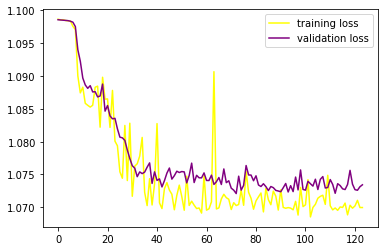

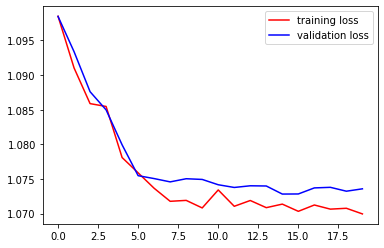

In [ ]:
#plot of losses over steps
t1 = []
for i in training_loss:
  t1.append(i.cpu().item())


plt.plot(t1,'yellow', label="training loss")
plt.plot(validation_loss, 'purple', label="validation loss")
plt.legend()
plt.show()

#plot of losses over epochs
t = []
v = []
for i in range(0,20):
  v.append(np.mean(validation_loss[i*6:(i+1)*6]))
  t.append(np.mean(t1[i*6:(i+1)*6]))

plt.plot(t,'red',label='training loss')
plt.plot(v, 'blue', label='validation loss')

plt.legend()
plt.show()

In [ ]:
from functools import total_ordering
test_losses = [] # track loss
num_correct = 0
num_sad_correct = 0
num_anger_correct = 0
num_fear_correct = 0

total_s = 0
total_a = 0
total_f = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

  h = tuple([each.data for each in h])

  if(train_on_gpu):
    inputs, labels = inputs.cuda(), labels.cuda()

  try:
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output, labels)
    test_losses.append(test_loss.item())

    #predict class by taking the argmax
    pred = output.argmax(1, keepdim = True)
    correct_tensor = pred.eq(labels.view_as(pred))
    # compare predictions to true label
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    num_correct += np.sum(correct)
    #count the number of correct predictions for each of the 3 emotions
    for i in range(64):
      if labels[i]==0:
        total_s +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_sad_correct += np.sum(correct)
      if labels[i]==1:
        total_a +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_anger_correct += np.sum(correct)
      if labels[i]==2:
        total_f +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_fear_correct += np.sum(correct)

  except:
    e+=1

# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data and for each of the emotions

test_acc = num_correct/len(test_loader.dataset)
test_acc_s = num_sad_correct/total_s
test_acc_a = num_anger_correct/total_a
test_acc_f = num_fear_correct/total_f

print("Test accuracy: {:.3f}".format(test_acc))
print("Test sad accuracy: {:.6f}".format(test_acc_s))
print("Test anger accuracy: {:.6f}".format(test_acc_a))
print("Test fear accuracy: {:.6f}".format(test_acc_f))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test loss: 1.073
Test accuracy: 0.562
Test sad accuracy: 0.515528
Test anger accuracy: 0.626374
Test fear accuracy: 0.583942


##Clean the Ucraine-Russia dataset and use it for negative emotions testing (without disgust)


In [ ]:
data_emoji_0.reset_index(inplace = True)
a = 'a ' + data_emoji_0.loc[0,'tweet']
a = re.sub("(?:\s)@[^, ]*", '', a)
a = a[2:]

In [ ]:
import re

all_tweets_u = list()
for t in data_emoji_0["tweet"]:
  t = 'a ' + t
  t = re.sub("(?:\s)@[^, ]*", '', t)
  t = t[2:]
  t = t.lower()
  t = "".join([ch for ch in t if ch not in punctuation])
  all_tweets_u.append(t)
all_text = " ".join(all_tweets_u)
all_words = all_text.split()

In [ ]:
encoded_tweets=list()
iter_1 = 0
iter_2 = 0
for t in all_tweets_u:
  encoded_tweet=list()
  for word in t.split():
    if word not in vocab_to_int.keys():
      #if word is not available in vocab_to_int put 0 in that place
      encoded_tweet.append(0)
      iter_1 += 1
    else:
      iter_2 += 1
      encoded_tweet.append(vocab_to_int[word])
  encoded_tweets.append(encoded_tweet)
print(iter_1)
print(iter_2)
print(encoded_tweets[0])

6868
16402
[1, 497, 57, 30, 1843, 106, 460, 2075, 267, 0, 4, 70, 15, 1843, 3, 494, 55, 194, 0, 23, 992, 83, 15, 5, 2178, 0, 3, 55, 628, 908, 1, 0, 7, 55, 91, 0, 2222, 476, 51, 0, 42, 0]


In [ ]:
sequence_length = 0
for i, tweet in enumerate(encoded_tweets):
  if len(tweet) > sequence_length:
    sequence_length = len(tweet)

features = []
for i, tweet in enumerate(encoded_tweets):
  tweet_len=len(tweet)
  if (tweet_len<=sequence_length):
    zeros=list(np.zeros(sequence_length-tweet_len))
    new=zeros+tweet
  else:
    new=tweet[:sequence_length]
  features.append(np.array(new))

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

test_x_u=features[:int(len(features))]
test_y_u=data_emoji_0["emotion"][:int(len(features))]

#create Tensor Dataset
test_data_u=TensorDataset(torch.FloatTensor(test_x_u).to(torch.int64), torch.FloatTensor(test_y_u.to_numpy(dtype=np.float64)).to(torch.int64))

#dataloader
batch_size=64
test_loader_u=DataLoader(test_data_u, batch_size=batch_size, shuffle=True)

In [ ]:
test_losses = [] # track loss
num_correct = 0
num_sad_correct = 0
num_anger_correct = 0
num_fear_correct = 0

total_s = 0
total_a = 0
total_f = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader_u:

  # Creating new variables for the hidden state, otherwise
  # we'd backprop through the entire training history
  h = tuple([each.data for each in h])
  e=0

  if(train_on_gpu):
    inputs, labels = inputs.cuda(), labels.cuda()

  try:
    output, h = net(inputs, h)

    # calculate loss
    test_loss = criterion(output, labels)
    test_losses.append(test_loss.item())

    # convert output probabilities to predicted class by taking argmax
    pred = output.argmax(1, keepdim = True)
    correct_tensor = pred.eq(labels.view_as(pred))
    # compare predictions to true label
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    
    num_correct += np.sum(correct)
    #count the correct predictions for each of the emotions
    for i in range(64):
      if labels[i]==0:
        total_s +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_sad_correct += np.sum(correct)
      if labels[i]==1:
        total_a +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_anger_correct += np.sum(correct)
      if labels[i]==2:
        total_f +=1
        correct_tensor = pred.eq(labels[i].view_as(pred[i]))
        correct = np.squeeze(correct_tensor[i].numpy()) if not train_on_gpu else np.squeeze(correct_tensor[i].cpu().numpy())
        num_fear_correct += np.sum(correct)
  except:
    e+=1
# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data amd each emotion
test_acc = num_correct/len(test_loader_u.dataset)
test_acc_s = num_sad_correct/total_s
test_acc_a = num_anger_correct/total_a
test_acc_f = num_fear_correct/total_f
print("Test accuracy: {:.3f}".format(test_acc))
print("Test sad accuracy: {:.6f}".format(test_acc_s))
print("Test anger accuracy: {:.6f}".format(test_acc_a))
print("Test fear accuracy: {:.6f}".format(test_acc_f))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Test loss: 1.096
Test accuracy: 0.312
Test sad accuracy: 0.176471
Test anger accuracy: 0.482412
Test fear accuracy: 0.400000
